In [7]:
# coding: utf-8

'''
Codigo para avaliar eficiência energética de turbina eólica 

Dados obtidos no kaggle: https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset/version/3

Exercício proposto no vídeo da Hashtag Programação: https://youtu.be/vgPPr9dFOZQ
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#lendo o arquivo
turbina = pd.read_csv('T1.csv')

# renomeando colunas
turbina.columns = ['Data/Hora', 'Potencia(kW)', 'VelocidadeVento(m/s)', 'CurvaTeorica(kWh)','DirecaoVento(°)']

#removendo coluna de direção do vento
del turbina ['DirecaoVento(°)']
turbina['Data/Hora'] = pd.to_datetime(turbina['Data/Hora'])
display(turbina)

,Data/Hora,Potencia(kW),VelocidadeVento(m/s),CurvaTeorica(kWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


<AxesSubplot:xlabel='VelocidadeVento(m/s)', ylabel='Potencia(kW)'>

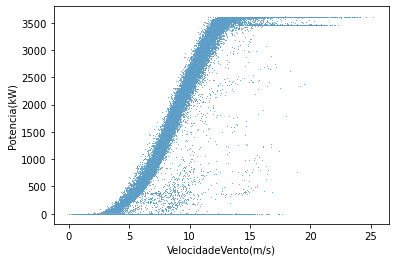

In [21]:
#plotando gráfico de dispersão da Potência
sns.scatterplot(data=turbina, x='VelocidadeVento(m/s)', y = 'Potencia(kW)',s=1)


<AxesSubplot:xlabel='VelocidadeVento(m/s)', ylabel='CurvaTeorica(kWh)'>

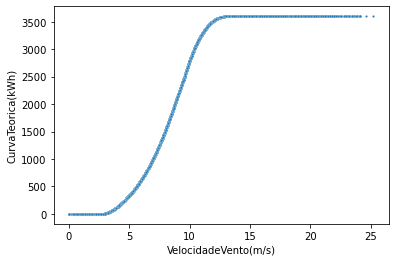

In [23]:
#plotando gráfico de dispersão da curva teórica de eficiência
sns.scatterplot(data=turbina, x='VelocidadeVento(m/s)', y = 'CurvaTeorica(kWh)', s=5)


In [16]:
#definindo limites aceitáveis
pot_real = turbina['Potencia(kW)'].tolist()
pot_teorica = turbina['CurvaTeorica(kWh)'].tolist()

pot_max = []
pot_min = []

#defimimdo aceitável como 5% de desvio da potencia teórica
for potencia in pot_teorica:
    pot_max.append(potencia * 1.05 )
    pot_min.append(potencia * 0.95 )
    
#classificcando os valores como dentro do limite, fora do limite ou zerado    
limites = []
for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        limites.append('Dentro')
    elif potencia == 0:
        limites.append('Zero')
    else:
        limites.append('Fora')

#incorporando a classificação ao df
turbina['Limite'] = limites


0.37286760340391845
0.06920641203245596


,Data/Hora,Potencia(kW),VelocidadeVento(m/s),CurvaTeorica(kWh),Limite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


<AxesSubplot:xlabel='VelocidadeVento(m/s)', ylabel='Potencia(kW)'>

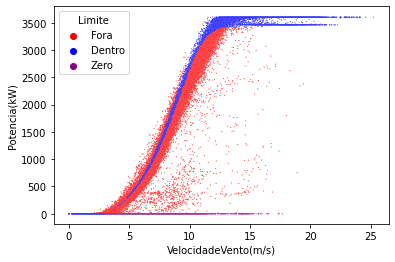

In [20]:
#plotando gráfico com as classes
cores = {
    'Dentro':'blue',
    'Fora':'red',
    'Zero':'purple',} # Dicionario de cores 

sns.scatterplot(data=turbina, x='VelocidadeVento(m/s)', y = 'Potencia(kW)', hue = 'Limite', s=1, palette = cores)
